# Análise exploratória de um dataset sobre notas escolares.
O dataset utilizado como base de dados pode ser encontrado em: https://www.kaggle.com/spscientist/students-performance-in-exams

Nesse notebook vamos analisar o dataset em questão e fazer algumas exibições de dados como:


● Distribuição de notas por gênero e a influência de cursos de preparação nas notas;

● Relação entre a escolaridade dos pais e as notas dos alunos;

● Relação entre a nota de leitura e a nota de escrita;

● Nota média para as 3 disciplinas por gênero;



O intuito desse notebook é apenas extrair, exibir e, se possível, correlacionar os dados a fim de inferir possíveis padrões e conclusões. O objetivo final é exercitar a utilização da linguagem python para extrair informações de bases de dados utilizando tabelas e gráficos.

Para mais informações sobre os dados do dataset, visite o link acima.

# Importando as bibliotecas e os dados
Primeiro começamos com os imports:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style = 'whitegrid')
%matplotlib inline

Com as bibliotecas importadas, vamos dar uma olhada nos dados:

In [2]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
True in df.isnull()

False

In [4]:
df.index

RangeIndex(start=0, stop=1000, step=1)

In [5]:
df_i = df.drop(labels = ['math score','reading score','writing score'], axis = 1)

In [6]:
for coluna in df_i.columns:
    print(f'\nOs valores únicos da coluna {coluna} são:', df_i[coluna].unique())


Os valores únicos da coluna gender são: ['female' 'male']

Os valores únicos da coluna race/ethnicity são: ['group B' 'group C' 'group A' 'group D' 'group E']

Os valores únicos da coluna parental level of education são: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Os valores únicos da coluna lunch são: ['standard' 'free/reduced']

Os valores únicos da coluna test preparation course são: ['none' 'completed']


Agora que sabemos os possíveis dados em cada coluna, excluindo as colunas de notas, e que não existem valores nulos no dataset, podemos começar a visualizar de fato as informações e relações entre esses dados.

Note que na coluna 'test preparation course' temos como entrada 'none' em algumas linhas. Podemos partir do ponto de vista que esses dados deveriam ser dados missing. Mas como não existe nenhuma especificação de qual tipo de curso os alunos fizeram, nem nessa mesma coluna nem em outra, logo, podemos considerar 'none' como uma entrada válida.

Uma possível forma de classificar os alunos por meio de suas notas seria calcular a média simples ou ponderada de cada um. Vamos considerar que cada nota tem um mesmo peso para aprovação, portanto, caso a média do(a) aluno(a) seja maior que 60 pontos, ele(a) será aprovado(a). Caso contrário, será reprovado(a).

Sendo assim, vamos adicionar duas colunas ao dataset: mean e approvation.

In [7]:
mean = [round(((df['math score'][line]+df['reading score'][line]+df['writing score'][line])/3),2) for line in df.index]
df['mean'] = mean

In [8]:
approvation = ['Yes' if score>=60 else 'No' for score in df['mean']]
df['approvation'] = approvation

In [9]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean,approvation
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,Yes
1,female,group C,some college,standard,completed,69,90,88,82.33,Yes
2,female,group B,master's degree,standard,none,90,95,93,92.67,Yes
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,No
4,male,group C,some college,standard,none,76,78,75,76.33,Yes


# Visualizando as informações
Vamos começar verificando a distribuição por gênero:

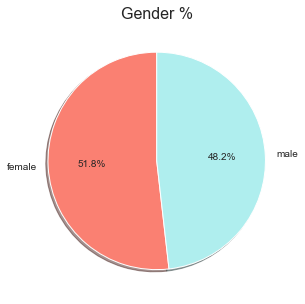

In [63]:
plt.figure(figsize=(10,5))
plt.pie(df['gender'].value_counts(), labels = df['gender'].unique(), autopct = "%.f%%", shadow = True, startangle=90,
       colors = ['salmon', 'paleturquoise'])
plt.title('Gender %', fontsize=16)
plt.show()

Mais mulhers (51.8%) do que homens (48.2%). Vamos verificar a distribuição das notas de cada matéria e da média, e vamos ver também a porcentagem de alunos aprovados:

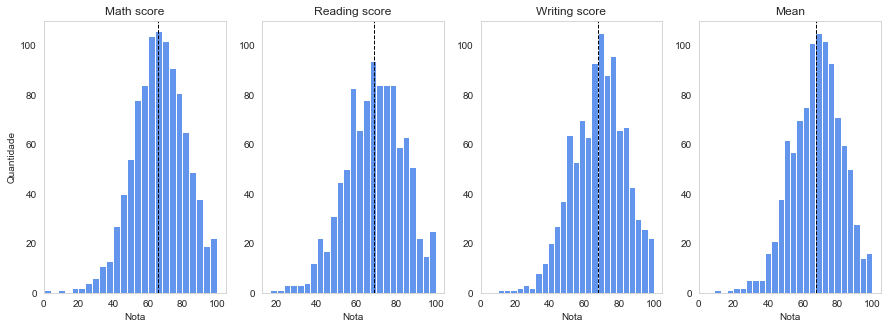

In [11]:
plt.figure(figsize=(15,5))

plt.subplot(1,4,1)
plt.hist(x = 'math score', data = df, bins = 25, color = 'cornflowerblue')
plt.axvline(df['math score'].mean(), color = 'k', linestyle='dashed', linewidth=1)
plt.title('Math score')
plt.xlabel('Nota')
plt.ylabel('Quantidade')
plt.ylim((0,110))
plt.xlim((0,105))
plt.grid()

plt.subplot(1,4,2)
plt.hist(x = 'reading score', data = df, bins = 25, color = 'cornflowerblue')
plt.axvline(df['reading score'].mean(), color = 'k', linestyle='dashed', linewidth=1)
plt.title('Reading score')
plt.xlabel('Nota')
plt.ylim((0,110))
plt.xlim()
plt.grid()

plt.subplot(1,4,3)
plt.hist(x = 'writing score', data = df, bins = 25, color = 'cornflowerblue')
plt.axvline(df['writing score'].mean(), color = 'k', linestyle='dashed', linewidth=1)
plt.title('Writing score')
plt.xlabel('Nota')
plt.ylim((0,110))
plt.xlim((0,105))
plt.grid()

plt.subplot(1,4,4)
plt.hist(x = 'mean', data = df, bins = 25, color = 'cornflowerblue')
plt.axvline(df['mean'].mean(), color = 'k', linestyle='dashed', linewidth=1)
plt.title('Mean')
plt.xlabel('Nota')
plt.ylim((0,110))
plt.xlim((0,105))
plt.grid()

In [12]:
means = pd.Series({'Math':round(df['math score'].mean(),2),
                   'Reading':round(df['reading score'].mean(),2),
                   'Writing':round(df['writing score'].mean(),2),
                   'Mean':round(df['mean'].mean(),2)})
print('As médias de cada matéria, mostradas nos histogramas acima como linha preta pontilhada, são:\n',means, sep='')

As médias de cada matéria, mostradas nos histogramas acima como linha preta pontilhada, são:
Math       66.09
Reading    69.17
Writing    68.05
Mean       67.77
dtype: float64


In [13]:
approved = 0
for data in df['approvation']:
    if data == 'Yes':
        approved += 1
        
disapproved = df['approvation'].count() - approved
total = df['approvation'].count()

appr_male = 0
disap_male = 0
appr_female = 0
disap_female = 0
for i in df['approvation'].index:
    if df['approvation'][i] == 'Yes' and df['gender'][i] == 'male':
        appr_male += 1
    elif df['approvation'][i] == 'No' and df['gender'][i] == 'male':
        disap_male += 1
    elif df['approvation'][i] == 'Yes' and df['gender'][i] == 'female':
        appr_female += 1
    else:
        disap_female += 1

total_appr = appr_male+appr_female
total_disap = disap_male+disap_female

#total approved/disapproved
print(f"Dos {total} alunos, {approved} foram aprovados e {disapproved} foram reprovados.")

#total approved/disapproved percentage
print(f"Ou {round((approved/total*100),1)}% aprovados e {round((disapproved/total*100), 1)}% reprovados.\n")

#approved by gender
print(f"Dos aprovados, {appr_male} são homens ({round(appr_male/total_appr*100,1)}%) e \
{appr_female} são mulheres ({round(appr_female/total_appr*100,1)}%).")

#disapproved by gender
print(f"E dos reprovados, {disap_male} são homens ({round(disap_male/total_disap*100,1)}%) e \
{disap_female} são mulheres ({round(disap_female/total_disap*100,1)}%).\n")

Dos 1000 alunos, 715 foram aprovados e 285 foram reprovados.
Ou 71.5% aprovados e 28.5% reprovados.

Dos aprovados, 321 são homens (44.9%) e 394 são mulheres (55.1%).
E dos reprovados, 161 são homens (56.5%) e 124 são mulheres (43.5%).



Graficamente:

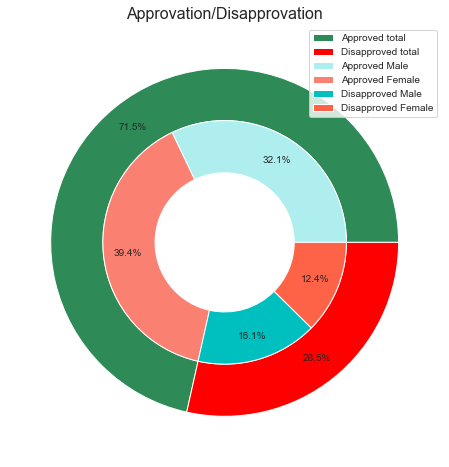

In [61]:
plt.figure(figsize=(12,8))
plt.pie(x = [approved,disapproved], autopct = '%.1f%%', pctdistance=.85,
        radius = 1, colors = ['seagreen','r'],wedgeprops=dict(width=.3))
plt.pie(x = [appr_male,appr_female,disap_male,disap_female], autopct = '%.1f%%', pctdistance=.8,
        colors = ['paleturquoise','salmon','c','tomato'] ,radius = .7, wedgeprops=dict(width=.3))
plt.legend(('Approved total','Disapproved total','Approved Male','Approved Female', 'Disapproved Male','Disapproved Female'))
plt.title('Approvation/Disapprovation', fontsize=16)
plt.show()

Com os histogramas apresentados podemos constatar que apenas em matemática algum(s) aluno(s) teve uma nota bem próxima de zero. Como as médias das matérias individuais são todas maiores que 60, já podemos inferir que a média dos alunos seriam aprovados. O dado mais preciso, como mostrado acima, é que 71.5% dos alunos foram aprovados e desses, a maior parte são mulheres.
Outro ponto interessante é que a distribuição das notas de leitura é bem diferente da distribuição da nota de escrita, além da média de escrita ser menor que a de leitura. Isso significa, nessa análise para esse dataset, que a boa escrita não está, necessariamente, associada a boa leitura/interpretação de texto (considerando que 'reading' possa siginicar o ato de ler e interpretar o que está sendo lido).

Agora veremos qual a influência da escolaridade dos pais dos alunos em relação às suas notas.

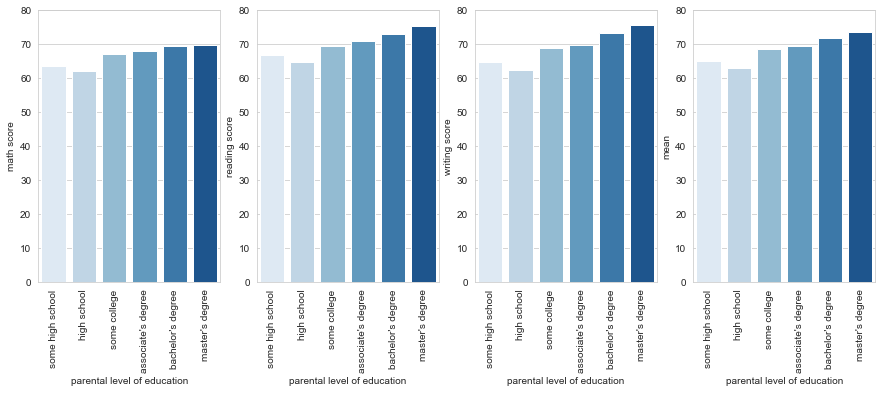

In [15]:
plt.figure(figsize=(15,5))

plt.subplot(1,4,1)
plt.xticks(rotation = 90)
plt.ylim((0,80))
sns.barplot(x = 'parental level of education', y = 'math score', palette = 'Blues', 
            order = ['some high school','high school','some college',"associate's degree","bachelor's degree",
                     "master's degree"], errwidth = 0, data = df)


plt.subplot(1,4,2)
plt.xticks(rotation = 90)
plt.ylim((0,80))
sns.barplot(x = 'parental level of education', y = 'reading score', palette = 'Blues',
            order = ['some high school','high school','some college',"associate's degree","bachelor's degree",
                    "master's degree"], errwidth = 0, data = df)


plt.subplot(1,4,3)
plt.xticks(rotation = 90)
plt.ylim((0,80))
sns.barplot(x = 'parental level of education', y = 'writing score', palette = 'Blues', 
            order = ['some high school','high school','some college',"associate's degree","bachelor's degree",
                    "master's degree"], errwidth = 0, data = df)


plt.subplot(1,4,4)
plt.xticks(rotation = 90)
plt.ylim((0,80))
sns.barplot(x = 'parental level of education', y = 'mean', palette = 'Blues',
            order = ['some high school','high school','some college',"associate's degree","bachelor's degree",
                    "master's degree"], errwidth = 0, data = df)
plt.show()

Podemos ver claramente que quanto maior o nível de escolaridade dos pais, com exceção ao nível high school, maiores as notas individuais, portanto, maiores as médias.

Agora veremos a influência de cursos preparatórios nas notas finais dos alunos.

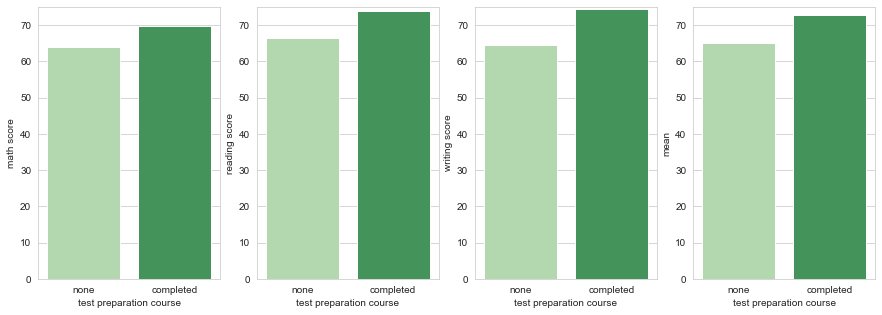

In [16]:
plt.figure(figsize=(15,5))

plt.subplot(1,4,1)
plt.ylim((0,75))
sns.barplot(x = 'test preparation course', y = 'math score', errwidth = 0, palette = 'Greens',data = df)

plt.subplot(1,4,2)
plt.ylim((0,75))
sns.barplot(x = 'test preparation course', y = 'reading score', errwidth = 0, palette = 'Greens',data = df)

plt.subplot(1,4,3)
plt.ylim((0,75))
sns.barplot(x = 'test preparation course', y = 'writing score', errwidth = 0, palette = 'Greens', data = df)

plt.subplot(1,4,4)
plt.ylim((0,75))
sns.barplot(x = 'test preparation course', y = 'mean', errwidth = 0, palette = 'Greens',data = df)

plt.show()

Para esse estudo, os cursos de preparação se converteram em notas maiores. Vale ressaltar que não estamos especificando qual tipo de curso, duração ou frequência. Portanto não podemos afirmar nem que o aumento da nota foi satisfatório e nem que foi abaixo do esperado.

In [17]:
#relação entre as notas de leitura e escrita


In [18]:
#nota por genero

SyntaxError: invalid syntax (<ipython-input-64-fc125001782a>, line 1)